# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: a list of free-tier customers likely to convert to paying customers

#### 2. What are the predictors/covariates? 

Answer: demographic data (age, gender, location and profession) and customer usage data (no. of days since last log in, activity score)

#### 3. What timeframe is this data relevent for?

Answer: relevant to Hooli data from Jan - April 2015

#### 4. What is the hypothesis?

Answer: Customers who are active are more likely to convert to paying customers

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit | 0 = not admitted 1 = admitted | ordinal
gre | X | numerical 
gpa | Y | numerical
prestige | | ordinal


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [11]:
admissions = pd.read_csv("/Users/n0rv1/Desktop/DataScience/DS-SG-04/projects/unit-projects/project-1/assets/admissions.csv")

In [12]:
admissions.head(10)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [ ]:
admissions_summary = admissions

In [13]:
admissions.describe(include='all')

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


We would like to explore the association between X and Y 

In [75]:
admissions.corr()['prestige']

admit      -0.241355
gre        -0.124533
gpa        -0.059031
prestige    1.000000
Name: prestige, dtype: float64

In [59]:
admissions.corr()['gpa']

admit       0.175952
gre         0.382408
gpa         1.000000
prestige   -0.059031
Name: gpa, dtype: float64

In [60]:
admissions.corr()['gre']

admit       0.182919
gre         1.000000
gpa         0.382408
prestige   -0.124533
Name: gre, dtype: float64

In [74]:
#determine association between gre score and admit
import statsmodels.formula.api as smf
lm = smf.ols(formula='admit ~ gre', data=admissions).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     13.71
Date:                Fri, 16 Jun 2017   Prob (F-statistic):           0.000244
Time:                        22:14:43   Log-Likelihood:                -254.17
No. Observations:                 398   AIC:                             512.3
Df Residuals:                     396   BIC:                             520.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1151      0.120     -0.963      0.336        -0.350     0.120
gre            0.0007      0.000      3.703      0.000         0.000     0.001
==============================================================================
Omnibus:                      659.340   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.243
Skew:                           0.732   Prob(JB):                     1.12e-14
Kurtosis:                       1.685   Cond. No.                     3.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
#determine association between gpa score and admit
import statsmodels.formula.api as smf
lm3 = smf.ols(formula='admit ~ gpa', data=admissions).fit()

#print the full summary
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.65
Date:                Fri, 16 Jun 2017   Prob (F-statistic):           0.000421
Time:                        23:17:50   Log-Likelihood:                -253.85
No. Observations:                 398   AIC:                             511.7
Df Residuals:                     396   BIC:                             519.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.4135      0.207     -2.002      0.046        -0.819    -0.007
gpa            0.2153      0.061      3.557      0.000         0.096     0.334
==============================================================================
Omnibus:                      527.016   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.218
Skew:                           0.752   Prob(JB):                     6.89e-15
Kurtosis:                       1.708   Cond. No.                         33.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
#determine association between prestige score and admit
import statsmodels.formula.api as smf
lm4 = smf.ols(formula='admit ~ prestige', data=admissions).fit()

#print the full summary
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     24.56
Date:                Fri, 16 Jun 2017   Prob (F-statistic):           1.07e-06
Time:                        23:18:31   Log-Likelihood:                -248.52
No. Observations:                 399   AIC:                             501.0
Df Residuals:                     397   BIC:                             509.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6112      0.064      9.585      0.000         0.486     0.737
prestige      -0.1188      0.024     -4.955      0.000        -0.166    -0.072
==============================================================================
Omnibus:                      277.527   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.297
Skew:                           0.726   Prob(JB):                     1.33e-13
Kurtosis:                       1.793   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#determine association between gpa, gre, prestige and admit
import statsmodels.formula.api as smf
lm2 = smf.ols(formula='admit ~ gre + gpa + prestige', data=admissions).fit()

#print the full summary
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Fri, 16 Jun 2017   Prob (F-statistic):           1.65e-08
Time:                        22:31:31   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.462        -0.591     0.269
gre            0.0004      0.000      2.063      0.040      2.05e-05     0.001
gpa            0.1462      0.064      2.296      0.022         0.021     0.271
prestige      -0.1097      0.024     -4.606      0.000        -0.156    -0.063
==============================================================================
Omnibus:                      191.690   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                           0.670   Prob(JB):                     7.02e-12
Kurtosis:                       1.855   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2. What is the outcome?

Answer: gre, gpa, gre have significant p-value which rejects the null hypothesis that there is no relation between gre, gpa, prestige and admit

#### 3. What are the predictors/covariates? 

Answer: gre, gpa, prestige

#### 4. What timeframe is this data relevent for?

Answer: relevant for 400 application data

#### 4. What is the hypothesis?

Answer: Higher gre results in higher admission rate

    Using the above information, write a well-formed problem statement. 


## Problem Statement

In [77]:
## Using admission data from 400 applications, determine how gpa, gre, prestige combination will result in admission success.

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: To visualize the data, get an overall picture of the variables as well as the structure, formulate hypothesis, decide on the approach and data needed to reject null hypothesis

#### 2a. What are the assumptions of the distribution of data? 

Answer: Normal Distribution

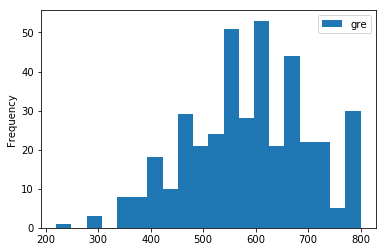

In [29]:
#Histogram for GRE
admissions [['gre']].plot(kind = 'hist', bins = 20)

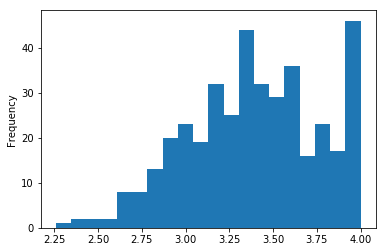

In [26]:
#Histogram for GPA
admissions ['gpa'].plot.hist(bins = 20)

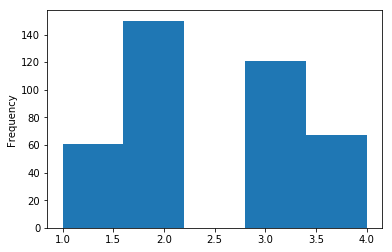

In [86]:
#Histogram for GPA
admissions ['prestige'].plot.hist(5)

#### 2b. How will determine the distribution of your data? 

Answer: calculate means, skew and curtosis of the data, use density plot

In [34]:
admissions.kurtosis()

admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64

In [35]:
admissions.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

In [36]:
admissions.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

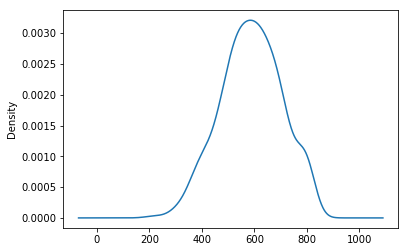

In [71]:
admissions['gre'].plot(kind='density')

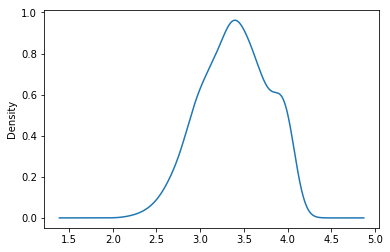

In [72]:
admissions['gpa'].plot(kind='density')

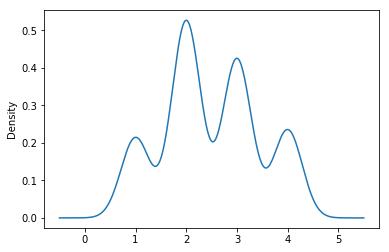

In [87]:
admissions['prestige'].plot(kind='density')

#### 3a. How might outliers impact your analysis? 

Answer: it will affect the mean of the data if it is a normal distribution

#### 3b. How will you test for outliers? 

Answer: use boxplot, histogram or scatter plot

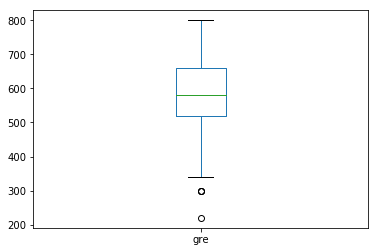

In [89]:
admissions['gre'].plot(kind='box')

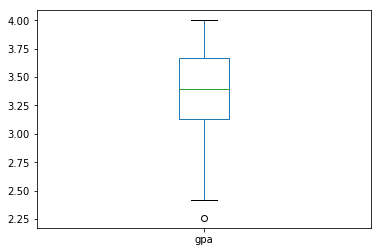

In [58]:
admissions['gpa'].plot(kind='box')

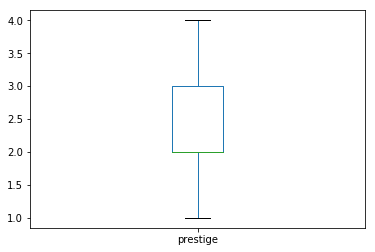

In [90]:
admissions['prestige'].plot(kind='box')

#### 4a. What is colinearity? 

Answer: a phenomenon when predictor variables are highly correlated where output can be predicted with substantial accuracy

#### 4b. How will you test for colinearity? 

Answer: p-value < 0.05

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: Describe and understand the data
Create Data Library
Create Descriptive Statistics for data
Determine data association using regression model
Analyse p-value and conclude whether null hypothesis can be rejected based on the p-value

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

In [92]:
#1. Generate the coefficients
lm2.params

Intercept   -0.161017
gre          0.000434
gpa          0.146223
prestige    -0.109666
dtype: float64

In [97]:
# Functions:
# y = -0.161017 + 0.000434 * gre + 0.146223 * gpa -0.109666 * prestige

In [98]:
#2. Alternative problem statement
# Utilising the data of gpa and prestige from 400 admission data, determine if they are determining factor for admission success

In [99]:
#3
# the smallest p value are for gpa and prestige. Assuming that these 2 factors has causal relation with admission success.